<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
features = pd.read_csv("/Users/FH/Desktop/Ironhack/Github/Project-week-3-Recommendations/Data/audio_features.csv")

In [13]:
features = features.drop(columns = ["type", "id", "uri", "track_href", "analysis_url", "duration_ms", "time_signature"])


In [14]:
scaler = StandardScaler()
scaler.fit(features)
standardized_features = scaler.transform(features)

In [15]:
pd.DataFrame(standardized_features, columns=features.columns)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.028497,0.533915,1.582833,0.882378,-1.227640,-0.348703,-0.603735,-0.360096,-0.556411,-0.835679,-0.542333
1,0.207780,0.730240,1.026761,0.581160,-1.227640,-0.702013,-0.067184,-0.303722,0.181267,-0.273403,0.126827
2,0.431885,0.115434,0.470689,0.246125,0.814571,-0.620907,-0.719243,-0.360052,0.472456,-0.055206,-0.353527
3,0.547138,-0.334046,0.748725,0.283699,0.814571,-0.547578,-0.346224,-0.360096,-0.575823,-1.624545,-0.240059
4,-1.386562,-1.434497,0.192654,-0.671307,-1.227640,0.922325,1.961446,-0.360096,-0.594589,-1.150386,2.047207
...,...,...,...,...,...,...,...,...,...,...,...
13942,1.161825,-0.700863,-1.475562,0.483781,0.814571,-0.555356,-0.075464,-0.359989,-0.876071,1.866606,-0.245717
13943,0.873690,-0.416709,1.304797,-0.708881,0.814571,-0.436475,-0.005083,-0.360096,-0.610119,1.778488,-0.169640
13944,0.425482,0.291093,0.192654,0.100839,0.814571,-0.519803,0.793949,-0.360096,2.672549,1.614840,-0.425018
13945,1.027362,0.099935,-1.475562,-0.029418,0.814571,-0.634239,1.096173,0.320281,-0.644414,1.887586,-0.227484


In [16]:
inertia = []
for i in range(2,25):
    k_mean = KMeans(n_clusters=i, random_state=32)
    k_mean.fit(features)
    inertia.append(k_mean.inertia_)

print(inertia)

[4269523.256098556, 1858632.6782150841, 1339258.7747409637, 967037.8495849695, 806963.7111614735, 680119.6715391836, 603694.9258905911, 538348.0368461311, 502752.9682525506, 471845.4225699935, 443113.4226141879, 421310.5762310463, 403968.8126146336, 387149.4642905922, 369876.83704935445, 353386.0541424585, 340739.4936535507, 329296.3083153385, 320214.09211719653, 312194.4032461118, 300649.46369821957, 292229.79711265146, 281550.49547107413]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

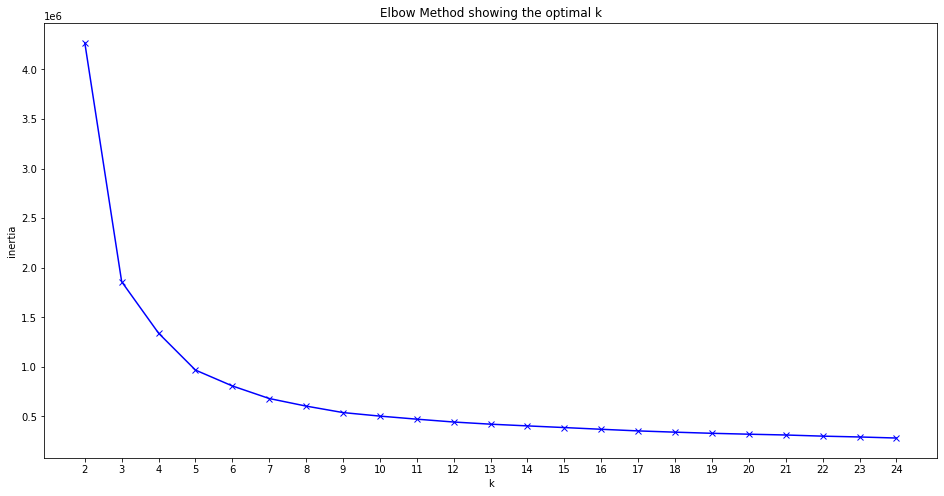

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(range(2,25), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(range(2,25)), max(range(2,25))+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [18]:
silhouette = []
for i in range(2,25):
    k_mean = KMeans(n_clusters=i, random_state=32)
    k_mean.fit(features)
    silhouette.append(silhouette_score(features, k_mean.predict(features)))

print(silhouette)

[0.5267578462121172, 0.5374904373784485, 0.486181250753854, 0.4473378292362275, 0.41165166784511487, 0.39813335586618, 0.3782432607053077, 0.34167644768420413, 0.3084297114959244, 0.2989382363447164, 0.2909675859533074, 0.2828074832095758, 0.2826959180018409, 0.27197401919498687, 0.28365760124652156, 0.27863725558416713, 0.2848381772362921, 0.28577702161591495, 0.2812558161595907, 0.28621385521960774, 0.28332103977889306, 0.276902150130931, 0.2738182654953472]


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

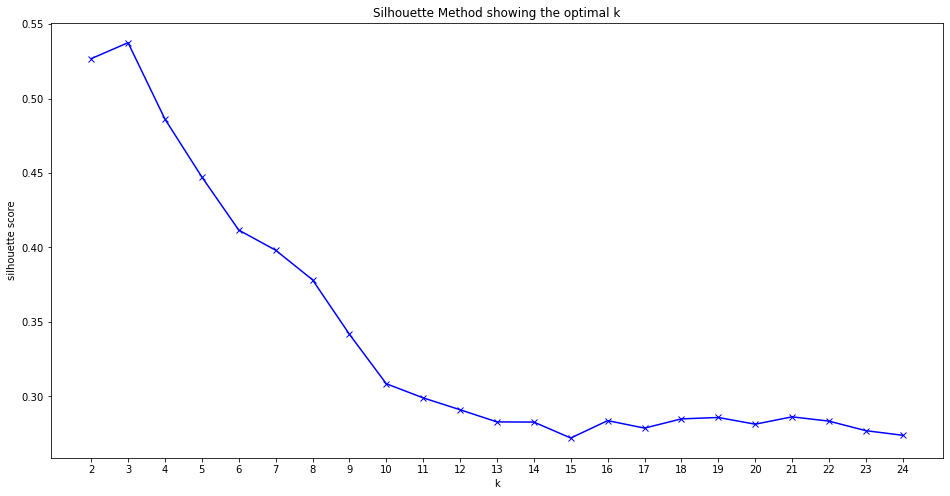

In [19]:
plt.figure(figsize=(16,8))
plt.plot(range(2,25), silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(range(2,25)), max(range(2,25))+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [20]:
features_kmean = KMeans(n_clusters=3, random_state=32)
features_kmean.fit(features)
clusters = features_kmean.predict(features)
pd.Series(clusters).value_counts().sort_index()

0    5149
1    2332
2    6466
dtype: int64

In [21]:
features_kmean2 = KMeans(n_clusters=5, random_state=32)
features_kmean2.fit(features)
clusters = features_kmean2.predict(features)
pd.Series(clusters).value_counts().sort_index()

0    1339
1    4948
2    2018
3    2139
4    3503
dtype: int64

In [22]:
import pickle

pickle_out = open("kmeans_features.pickle","wb")
pickle.dump(features_kmean, pickle_out)
#pickle_out.close()



In [23]:
import pickle

pickle_out = open("scaler.pickle","wb")
pickle.dump(scaler, pickle_out)
#pickle_out.close()

